In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# load data

In [2]:
# train data
df_train=pd.read_csv("training_data.csv")
df_train

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [3]:
# test data
df_test=pd.read_csv("test_data.csv",names=["text"])
df_test

,text
0,Three quarters of financial firms still conduc...
1,European stocks rally on hope ECB may be done ...
2,"Gold prices have hit a new high, while the val..."
3,Why food discount stickers may be a thing of t...
4,German cabinet tries to solve ‘no-debt’ crisis...
5,Indonesia's volcano eruption leaves 22 dead
6,"Adverts for Air France, Lufthansa and Etihad h..."
7,Maori MP performs haka before swearing oath to...
8,Philippines earthquake: Video shows chaos in s...
9,Wakeskater plunges off Dubai skyscraper pool i...


In [4]:
df_train["label"].unique()

array([2, 3, 1, 0])

In [5]:
df_train["label"].value_counts()

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

In [6]:
#map the categories(label data) #world ,sports,bussiness and sci are mentioned in dataset
category_mapping={0:"World",1:"Sports",2:"Bussiness",3:"Sci/tech"}
df_train["label_map"]=df_train["label"].map(category_mapping)

In [7]:
df_train

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Bussiness
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Bussiness
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Bussiness
4,"Oil prices soar to all-time record, posing new...",2,Bussiness
...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0,World
119996,Renteria signing a top-shelf deal Red Sox gene...,1,Sports
119997,Saban not going to Dolphins yet The Miami Dolp...,1,Sports
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1,Sports


In [8]:
df_train["label_map"].value_counts()

label_map
Bussiness    30000
Sci/tech     30000
Sports       30000
World        30000
Name: count, dtype: int64

In [9]:
# drop duplicates
unique_new=df_train.drop_duplicates(subset=["label_map"])
unique_new

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
78,"'Madden,' 'ESPN' Football Score in Different W...",3,Sci/tech
448,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",1,Sports
492,Venezuelans Vote Early in Referendum on Chavez...,0,World


In [10]:
for _,row in unique_new.iterrows():
    print(f"Topic:,{row["label_map"]}")
    print(f"News:,{row["text"]}")
    print("-"*70)

Topic:,Bussiness
News:,Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
----------------------------------------------------------------------
Topic:,Sci/tech
News:,'Madden,' 'ESPN' Football Score in Different Ways (Reuters) Reuters - Was absenteeism a little high\on Tuesday among the guys at the office? EA Sports would like\to think it was because "Madden NFL 2005" came out that day,\and some fans of the football simulation are rabid enough to\take a sick day to play it.
----------------------------------------------------------------------
Topic:,Sports
News:,Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were fa

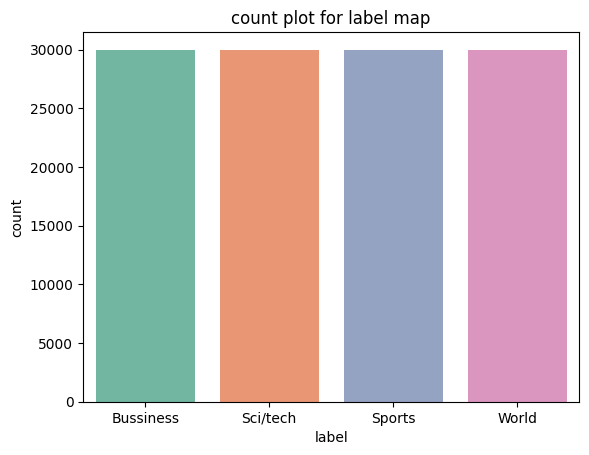

In [11]:
plt.Figure(figsize=(10,6))
sns.countplot(x='label_map',data=df_train,palette='Set2')
plt.title("count plot for label map")
plt.xlabel("label")
plt.ylabel("count")
plt.show()
    
             


In [12]:
my_text=" ".join(df_train["text"].astype(str))

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# word cloud
from wordcloud import WordCloud




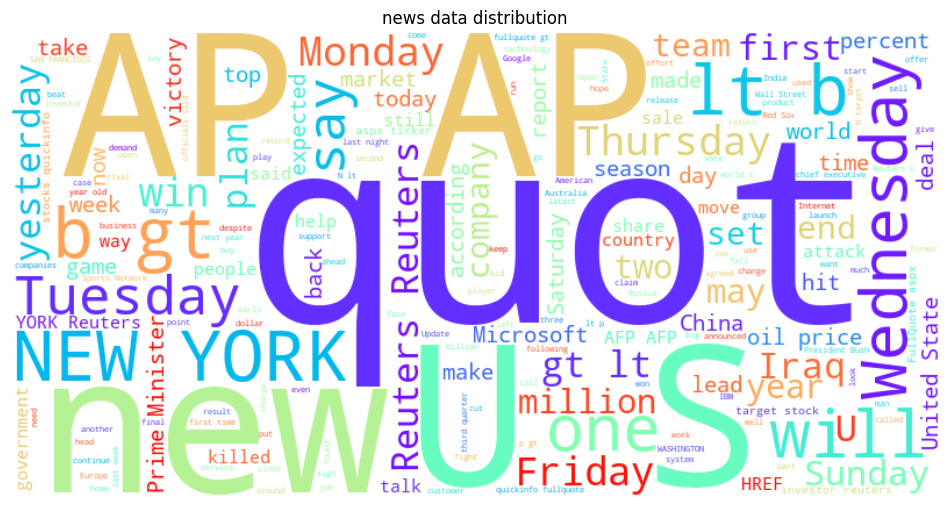

In [15]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="rainbow",
    stopwords=None
).generate(my_text)
 
plt.figure(figsize=(12,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("news data distribution")
plt.show()

# text data cleaning

In [16]:
import re,string
def data_cleaning(text):
    text = text.lower() #lower_case the text
    text = re.sub('\[.*?\]', '', text) #remove brackets and words
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls
    text = re.sub('<.*?>+', '', text) #remove html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# remove punctuationz
    text = re.sub('\n', '', text) #remove newline characters from the text.
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text=re.sub(r'[^\x00-\x7F]+', '', text) # remove emoji
    return text


In [17]:
df_train.head()

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Bussiness
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Bussiness
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Bussiness
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Bussiness
4,"Oil prices soar to all-time record, posing new...",2,Bussiness


In [18]:
df_train["text"]=df_train["text"].apply(data_cleaning)
df_train.head()

,text,label,label_map
0,wall st bears claw back into the black reuters...,2,Bussiness
1,carlyle looks toward commercial aerospace reut...,2,Bussiness
2,oil and economy cloud stocks outlook reuters r...,2,Bussiness
3,iraq halts oil exports from main southern pipe...,2,Bussiness
4,oil prices soar to alltime record posing new m...,2,Bussiness


# Tokenization

split a string of text into individual words (tokens)

In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mishe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mishe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
from nltk import word_tokenize
df_train["text"]= df_train["text"].apply(word_tokenize)
df_train.head()

,text,label,label_map
0,"[wall, st, bears, claw, back, into, the, black...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, and, economy, cloud, stocks, outlook, re...",2,Bussiness
3,"[iraq, halts, oil, exports, from, main, southe...",2,Bussiness
4,"[oil, prices, soar, to, alltime, record, posin...",2,Bussiness


# stopwords
## eg:the,is,in,at,on

In [22]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mishe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
def stop_words(text):
    stop_words=set(stopwords.words("english"))
    text=[words for words in text if words not in stop_words]
    return text

In [24]:
df_train["text"]=df_train["text"].apply(stop_words)
df_train.head()

,text,label,label_map
0,"[wall, st, bears, claw, back, black, reuters, ...",2,Bussiness
1,"[carlyle, looks, toward, commercial, aerospace...",2,Bussiness
2,"[oil, economy, cloud, stocks, outlook, reuters...",2,Bussiness
3,"[iraq, halts, oil, exports, main, southern, pi...",2,Bussiness
4,"[oil, prices, soar, alltime, record, posing, n...",2,Bussiness


# lemmatization

In [25]:
# lemmatizartion retain only base words
# change,changes,changed,changing===>retain only change
#run ,ran,running--->retain only run (base word for all)

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mishe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemma_stem=WordNetLemmatizer()
    text=" ".join(lemma_stem.lemmatize(words) for words in text)
    return text 

In [28]:
df_train["text"]=df_train["text"].apply(lemma)
df_train.head()

,text,label,label_map
0,wall st bear claw back black reuters reuters s...,2,Bussiness
1,carlyle look toward commercial aerospace reute...,2,Bussiness
2,oil economy cloud stock outlook reuters reuter...,2,Bussiness
3,iraq halt oil export main southern pipeline re...,2,Bussiness
4,oil price soar alltime record posing new menac...,2,Bussiness


# split x,y data

In [29]:
x=df_train["text"]
y=df_train["label"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [31]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)


x_train: (90000,)
x_test: (30000,)


# vectorization

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
x_tfidf_train=tfidf.fit_transform(x_train)
x_tfidf_test=tfidf.transform(x_test)

In [33]:
x_tfidf_train.shape

(90000, 71884)

In [34]:
x_tfidf_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1909724 stored elements and shape (90000, 71884)>

# model building

# random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # max depth of each tree
    random_state=42
)

In [37]:
rf.fit(x_tfidf_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = rf.predict(x_tfidf_test)

In [39]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy: 0.8915333333333333
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7472
           1       0.93      0.97      0.95      7560
           2       0.86      0.86      0.86      7440
           3       0.87      0.85      0.86      7528

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



In [40]:
print("confusion_matrix:",confusion_matrix(y_test,y_pred))

confusion_matrix: [[6659  290  326  197]
 [  95 7351   60   54]
 [ 276  113 6371  680]
 [ 312  171  680 6365]]


In [41]:
cm=confusion_matrix(y_test,y_pred)

Text(50.72222222222221, 0.5, 'predicted values')

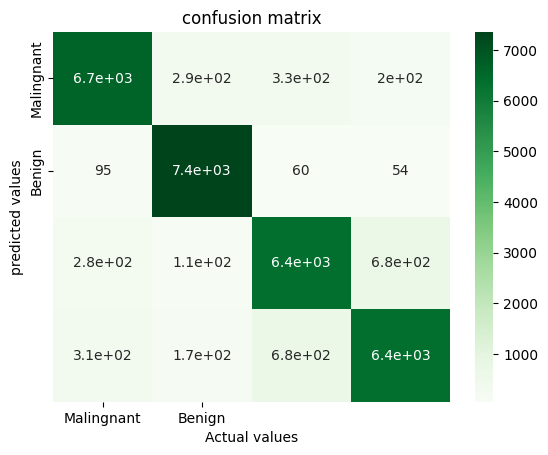

In [42]:
plt.Figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap="Greens",xticklabels=["Malingnant","Benign"],yticklabels=["Malingnant","Benign"])
plt.title("confusion matrix")
plt.xlabel("Actual values")
plt.ylabel("predicted values")

# naive bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
model_nav=MultinomialNB()
model_nav.fit(x_tfidf_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [45]:
y_pred_nav=model_nav.predict(x_tfidf_test)

In [46]:
 # evaluation metrics
print("accuracy_score",np.round(accuracy_score(y_test,y_pred_nav),2))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_nav))
print("classification_report:\n",classification_report(y_test,y_pred_nav))

accuracy_score 0.9
confusion_matrix:
 [[6689  275  353  155]
 [  83 7402   44   31]
 [ 240   73 6529  598]
 [ 301   63  638 6526]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7472
           1       0.95      0.98      0.96      7560
           2       0.86      0.88      0.87      7440
           3       0.89      0.87      0.88      7528

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



# XG Boost

In [47]:
from xgboost import XGBClassifier

In [48]:
model_xgb = XGBClassifier(n_estimators=100,random_state=42)
model_xgb.fit(x_tfidf_train,y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
y_pred_xgb= model_xgb.predict(x_tfidf_test)

In [50]:
print("accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_xgb))
print("classification_report:\n",classification_report(y_test,y_pred_xgb))

accuracy_score: 0.8878
confusion_matrix:
 [[6600  308  298  266]
 [ 120 7199   95  146]
 [ 266   95 6410  669]
 [ 278  185  640 6425]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      7472
           1       0.92      0.95      0.94      7560
           2       0.86      0.86      0.86      7440
           3       0.86      0.85      0.85      7528

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000



# LSTM

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

In [52]:
text = df_train['text'].astype(str)
labels = df_train['label']


In [53]:
vocab_size = 5000  
max_length = 10   

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [54]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [57]:
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # use 'sigmoid' for binary
])


In [58]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [59]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.8285 - loss: 0.4873 - val_accuracy: 0.8684 - val_loss: 0.3786
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.8815 - loss: 0.3482 - val_accuracy: 0.8732 - val_loss: 0.3568
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.8913 - loss: 0.3118 - val_accuracy: 0.8749 - val_loss: 0.3550
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9005 - loss: 0.2809 - val_accuracy: 0.8721 - val_loss: 0.3652
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 42ms/step - accuracy: 0.9090 - loss: 0.2484 - val_accuracy: 0.8721 - val_loss: 0.3947
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 51s 43ms/step - accuracy: 0.9189 - loss: 0.2187 - val_accuracy: 0.8706 - val_loss: 0.4032
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.9271 - loss: 0.1922 - val_accuracy: 0.8701 - val_loss: 0.4550
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.9350 -

In [60]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8633 - loss: 0.5700
Test Accuracy: 0.8633


In [61]:
x=df_train["text"]
y=df_train["label"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [63]:
X_train.shape

(96000,)

In [64]:
y_train

53541     0
41728     1
74819     1
106459    3
63062     2
         ..
110268    3
119879    3
103694    1
860       3
15795     3
Name: label, Length: 96000, dtype: int64

In [66]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])


# hyperparameter tuning

In [67]:
param_grid = {
    'tfidf__max_df': [0.75, 1.0],             # ignore words that appear in >x% of docs
    'tfidf__min_df': [1, 2, 3],               # ignore rare words
    'tfidf__ngram_range': [(1,1), (1,2)],     # unigrams vs bigrams
    'tfidf__stop_words': [None, 'english'],
    'nb__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]   # smoothing parameter
}


In [69]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,estimator,Pipeline(step...inomialNB())])
,param_grid,"{'nb__alpha': [0.1, 0.5, ...], 'tfidf__max_df': [0.75, 1.0], 'tfidf__min_df': [1, 2, ...], 'tfidf__ngram_range': [(1, ...), (1, ...)], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [70]:
print("Best Parameters:\n", grid.best_params_)
print("\nBest CV Accuracy:", grid.best_score_)

best_model = grid.best_estimator_


Best Parameters:
 {'nb__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}

Best CV Accuracy: 0.9168854166666666


In [71]:
y_pred = best_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Test Accuracy: 0.9165833333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      5956
           1       0.95      0.99      0.97      6058
           2       0.88      0.89      0.88      5911
           3       0.90      0.89      0.90      6075

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000



# MODEL SAVE

In [72]:
import pickle 
#save model
with open("Bestmodelhyper.pkl","wb") as files:
    pickle.dump(best_model,files)

In [73]:
import pickle 
#save model
with open("Bestmodel.pkl","wb") as files:
    pickle.dump(model_nav,files)

In [74]:
with open("tfidf_vector.pkl","wb") as vector_files:
    pickle.dump(tfidf,vector_files)

In [79]:
with open("Bestmodel.pkl","rb") as files:
     model = pickle.load(files)

In [76]:
with open("tfidf_vector.pkl","rb") as vector_files:
    vector = pickle.load(vector_files)

# new data prediction

In [80]:
texts = ["Amazon expands operations in India to strengthen its global supply chain.",
        "Manchester United secures dramatic last-minute victory over Liverpool.",
        "UN sends humanitarian aid to regions affected by severe flooding.",
        "Apple launches new iPhone with advanced features"
]

new_texts_tfidf = vector.transform(texts)
predictions = model.predict(new_texts_tfidf)

for txt, p in zip(texts, predictions):
    if p == 0:
        label = "It is world news"
    elif p == 1:
        label = "It is sports news"
    elif p == 2:
        label = "It is business news"
    else:
        label = "It is science and technology news"

    print(f"Text: {txt}")
    print(f"Prediction: {label}")
    print("-" * 50)

Text: Amazon expands operations in India to strengthen its global supply chain.
Prediction: It is business news
--------------------------------------------------
Text: Manchester United secures dramatic last-minute victory over Liverpool.
Prediction: It is sports news
--------------------------------------------------
Text: UN sends humanitarian aid to regions affected by severe flooding.
Prediction: It is world news
--------------------------------------------------
Text: Apple launches new iPhone with advanced features
Prediction: It is science and technology news
--------------------------------------------------


# test data prediction

In [81]:
test_data = vector.transform(df_test["text"])
pred = model.predict(test_data)

In [82]:
df_test["label"] = pred
df_test.head()

,text,label
0,Three quarters of financial firms still conduc...,3
1,European stocks rally on hope ECB may be done ...,2
2,"Gold prices have hit a new high, while the val...",2
3,Why food discount stickers may be a thing of t...,2
4,German cabinet tries to solve ‘no-debt’ crisis...,0


In [83]:
# save model in csv
df_test.to_csv("test_data_prediction.csv",index=False)